In [1]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set() 
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from datetime import datetime




         See 'conda install --help' for details about the --force-reinstall
         and --clobber flags.


Solving environment: done

## Package Plan ##

  environment location: /home/jcolewrld/anaconda3

  added / updated specs:
    - numpy



Preparing transaction: done
Verifying transaction: done
Executing transaction: done


## Exploratory Data Analysis and clustering on the Chicago Crime Data 
### Which is accessable at https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
### We have only used the data of since 2010

In [2]:

df = pd.read_csv('/home/jcolewrld/Chicago Crime Analytics/Crimes.csv', index_col=['Date'])

In [3]:
df.shape

(7317178, 21)

In [4]:
df.head()


,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
09/05/2015 01:30:00 PM,10224738,HY411648,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
09/04/2015 11:30:00 AM,10224739,HY411615,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
09/01/2018 12:01:00 AM,11646166,JC213529,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
09/05/2015 12:45:00 PM,10224740,HY411595,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
09/05/2015 01:00:00 PM,10224741,HY411610,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [5]:
df['Date'] =  pd.to_datetime(df.index, format='%m/%d/%Y %I:%M:%S %p')
df['Date_year'] = df.Date.map(lambda x: x.year)
df['Date_month'] = df.Date.map(lambda x: x.month)
df['Date_day'] = df.Date.map(lambda x: x.day)
df['Date_hour'] = df.Date.map(lambda x: x.hour)
df['Date_minute'] = df.Date.map(lambda x: x.minute)
df['Date_weekday'] = df.Date.map(lambda x: x.dayofweek)

In [6]:
df = df[df['Date_year']>=2010]

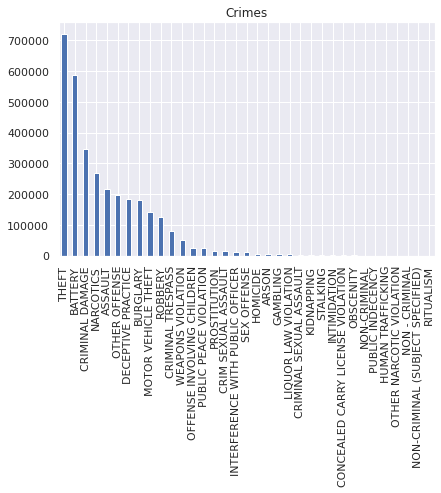

In [7]:
#the most common crime committed
df['Primary Type'].value_counts().plot.bar()
plt.title('Crimes')
plt.show()

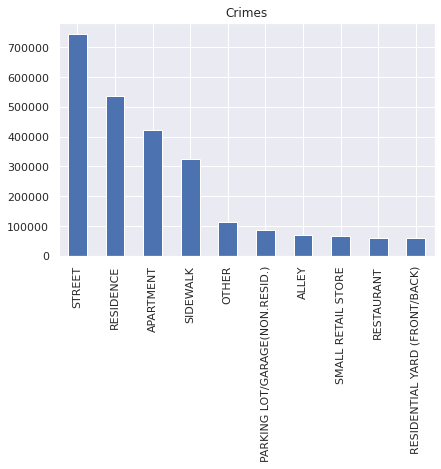

In [8]:
#where do the most crimes take place
df['Location Description'].value_counts()[:10].plot.bar()
plt.title('Crimes')
plt.show()

In [9]:
#making a function to plot 2 graphs one shows arrest nos the other shows no arrest nos
def fn_barplot(data,col):
    if data[col].dtype in ['object']:
        fig, ((ax1, ax2)) = plt.subplots(2, 1, figsize=(15,20))
        
        plot_df = df[['Arrest',col]].dropna()
        df_1 = plot_df.loc[plot_df['Arrest']==True]
        df_2 = plot_df.loc[plot_df['Arrest']==False]
        
        df_1.groupby(col)[col].count().nlargest(10).plot(kind='barh' , ax=ax1, title='Arrest'  +col)
        df_2.groupby(col)[col].count().nlargest(10).plot(kind='barh' , ax=ax2, title='NoArrest'  +col)
    return plt.show()

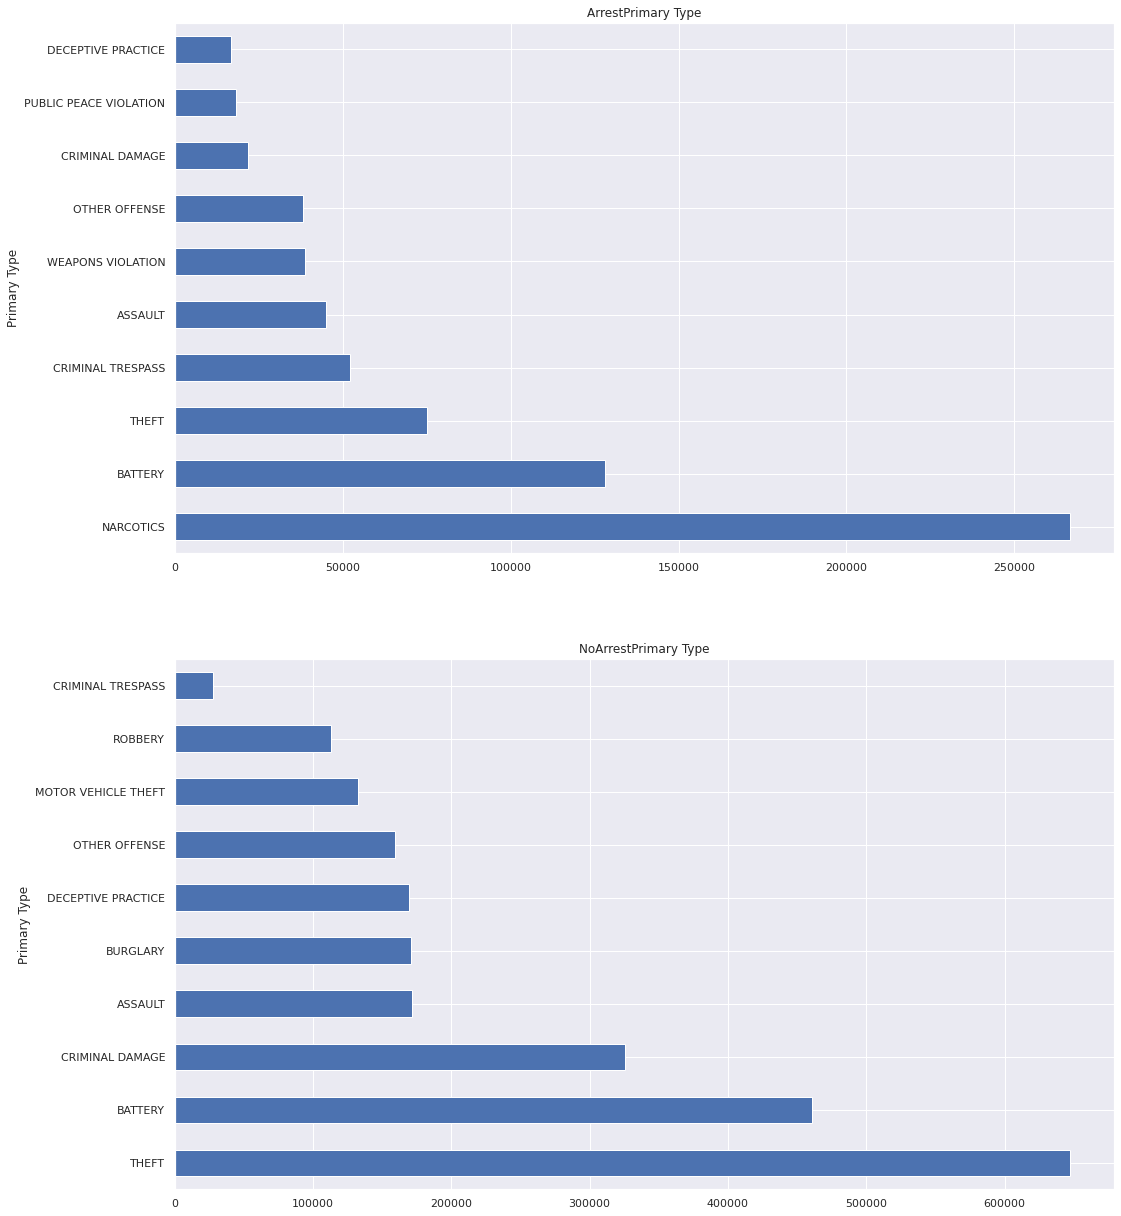

In [10]:
fn_barplot(df, 'Primary Type')

/home/jcolewrld/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


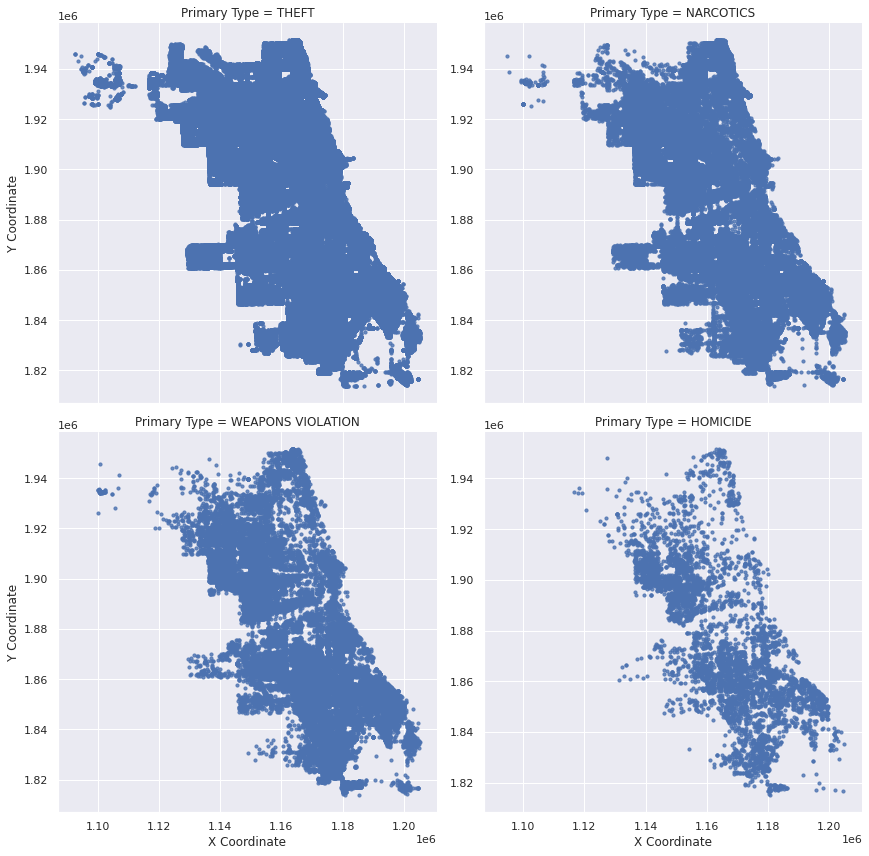

In [11]:
cols = ['Date', 'Primary Type', 'Arrest', 'Domestic', 'X Coordinate', 'Y Coordinate']
multiple_crimes = df[cols]

multiple_crimes = multiple_crimes[(multiple_crimes['Primary Type'] == "THEFT")|(multiple_crimes['Primary Type'] == "NARCOTICS")| (multiple_crimes['Primary Type'] == "WEAPONS VIOLATION") |(multiple_crimes['Primary Type'] == "HOMICIDE")]

multiple_crimes = multiple_crimes[multiple_crimes['X Coordinate'] != 0]

g = sns.lmplot(x= "X Coordinate", y= 'Y Coordinate', col= 'Primary Type', data=multiple_crimes.dropna(), col_wrap=2, size=6 , fit_reg= False, sharey=False, scatter_kws={"marker":"D","s" :10})

In [12]:
import folium

In [13]:
Chicago_CoOrdinates = [41.881832 , -87.623177]
chicago_map = folium.Map(location=Chicago_CoOrdinates, zoom_start=11)

In [14]:
## Function to map markers by crime type
def fn_crime_map(crime_type):
    Crimes = df[df['Primary Type'] == crime_type]
    locations = Crimes.groupby('Community Area').first()
    locations = locations.dropna()
   
    new_locations = locations.iloc[:,[17, 18,6,7]]
    
    for i in range(len(new_locations)):
        lat = new_locations.iloc[i][0]
        long = new_locations.iloc[i][1]
        popup_text = """Community Index : {} <br>  Arrest : {} <br> Location Description: {} <br>"""
        popup_text = popup_text.format(new_locations.index[i], new_locations.iloc[i][3],new_locations.iloc[i][2])
        folium.CircleMarker(location= [lat, long], popup= popup_text , fill = True).add_to(chicago_map)
    return chicago_map

In [15]:
#areas where the theft cases were recorded
fn_crime_map('THEFT')

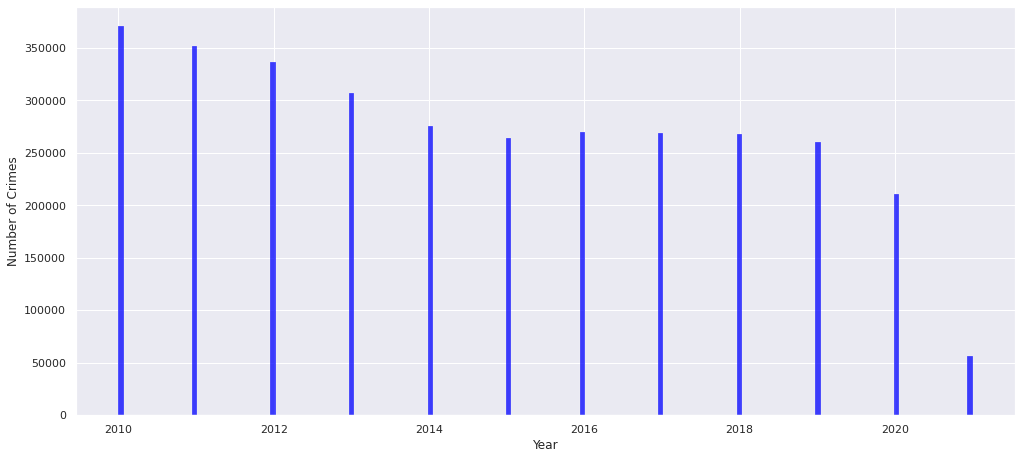

In [16]:
#By Year
sns.histplot(x='Year', data = df, color =('blue'))
fig = plt.gcf()
plt.ylabel('Number of Crimes')
fig.set_size_inches(15,7)

plt.show()

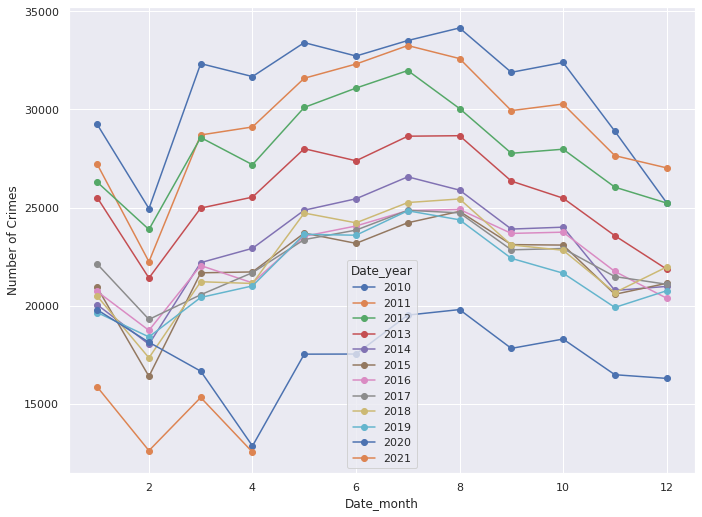

In [17]:
#by Year and month
df.groupby(['Date_month','Date_year'])['ID'].count().unstack().plot(marker = 'o' , figsize = (10,8))
plt.ylabel('Number of Crimes')

plt.show()

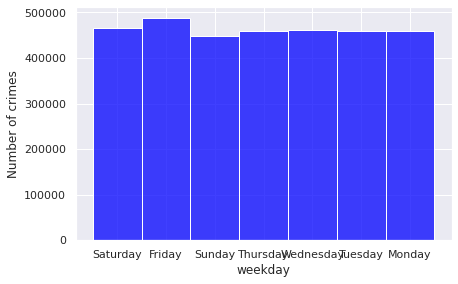

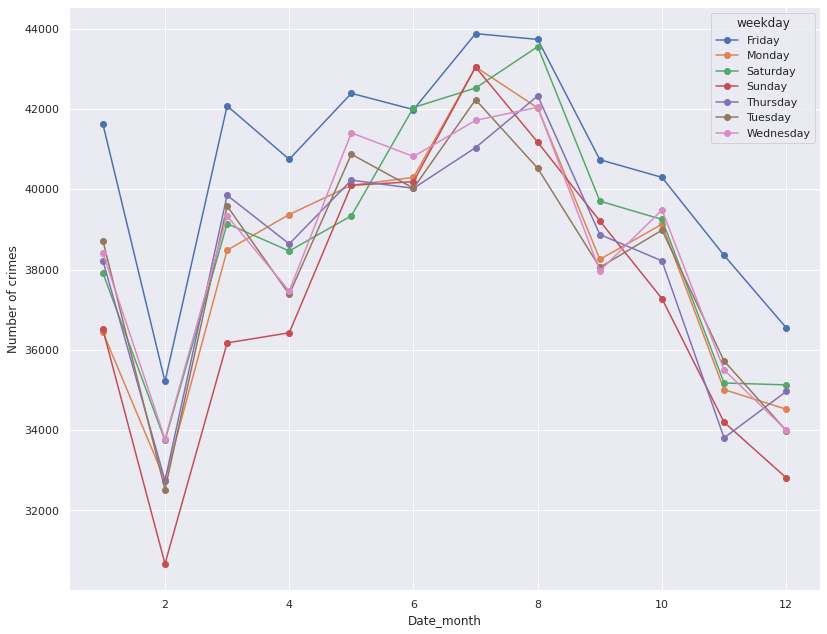

In [18]:
#by month and weekday
dayofweek = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday',}
df['weekday'] = df['Date_weekday'].map(dayofweek)

sns.histplot(x='weekday', data = df , color=('blue'))
plt.ylabel('Number of crimes')
plt.show()

df.groupby(['Date_month','weekday'])["ID"].count().unstack().plot(marker = 'o' , figsize = (12,10))
plt.ylabel('Number of crimes')
plt.show()


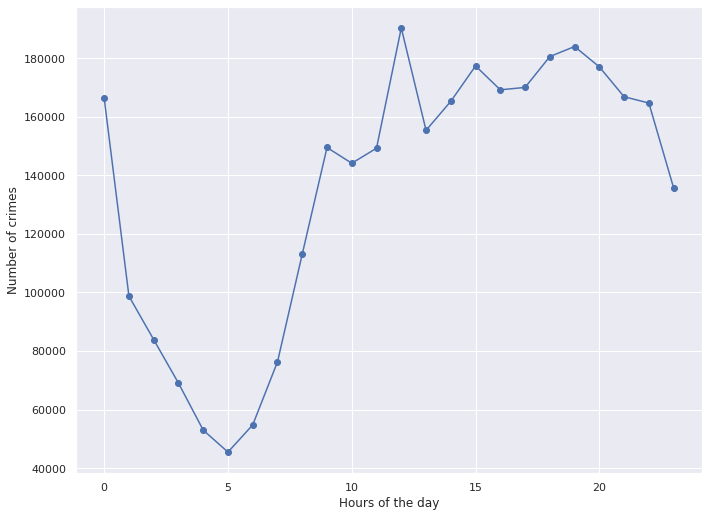

In [31]:
#by hour
df.groupby(['Date_hour'])["ID"].count().plot(marker = 'o' , figsize = (10,8))
plt.ylabel('Number of crimes')
plt.xlabel('Hours of the day')
plt.show()

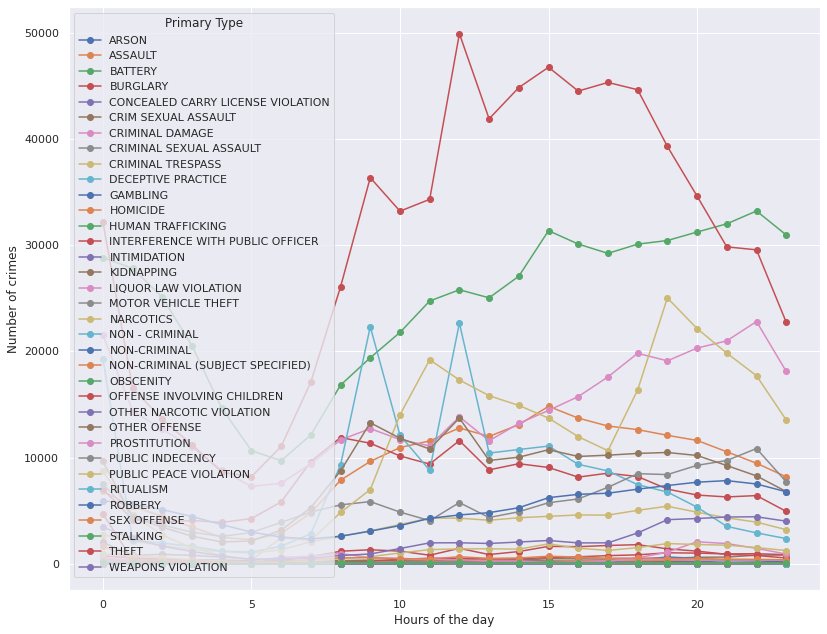

In [32]:
#each crime by hour
df.groupby(['Date_hour','Primary Type'])["ID"].count().unstack().plot(marker = 'o' , figsize = (12,10))
plt.ylabel('Number of crimes')
plt.xlabel('Hours of the day')
plt.show()

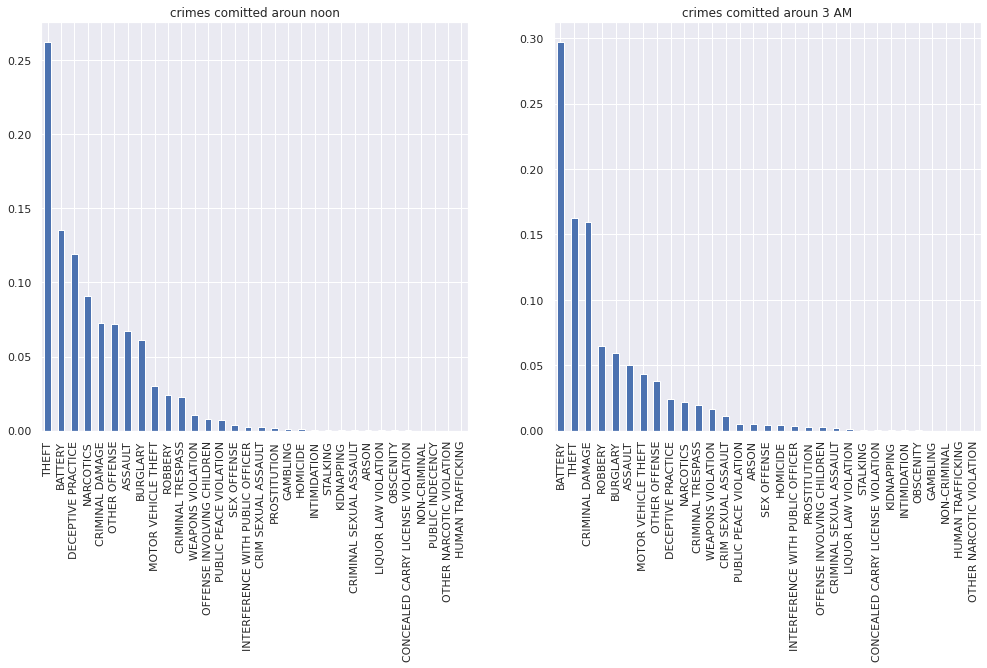

In [21]:
#crimes commited around noon and 3AM
fig, ((ax1,ax2)) = plt.subplots(1 , 2, figsize=(15,7))

df[df['Date_hour'] == 12]['Primary Type'].value_counts(normalize=True).plot(kind='bar',ax=ax1, title="crimes comitted aroun noon")

df[df['Date_hour'] == 3]['Primary Type'].value_counts(normalize=True).plot(kind='bar',ax=ax2, title="crimes comitted aroun 3 AM")

plt.show()

In [22]:
#clustering
#police beat , hour , and Primary Typr
train = df[['Beat','Date_hour','IUCR']]

In [23]:
#pre-processing

for f in train.columns:
    if train[f].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train[f].values))
        train[f] =  lbl.transform(list(train[f].values))

<ipython-input-23-7930110b209b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[f] =  lbl.transform(list(train[f].values))


In [24]:

clustering_model = KMeans(3)

In [25]:
%time clusters = clustering_model.fit_predict(train)

CPU times: user 59.3 s, sys: 1.3 s, total: 1min
Wall time: 6.59 s


In [26]:
#checking the score
silhouette = silhouette_score(train.values, clusters, sample_size=2000)
print("Silhouette Score: ", silhouette)

Silhouette Score:  0.5362121818209636


In [27]:
#joining the dataset
final = train.join(pd.Series(clusters, index=train.index, name='cluster'))
final['cluster'] = final['cluster'].map(lambda cluster_id: cluster_id)

In [28]:
#size of the clusters
size = pd.DataFrame({'size': final['cluster'].value_counts()})
size.head()

,size
1,9761986
0,7499670
2,6650175


In [29]:
final.head()

,Beat,Date_hour,IUCR,cluster
Date,,,,
01/01/2010 01:00:00 AM,731,1,154,1
01/01/2010 01:00:00 AM,731,1,154,2
01/01/2010 01:00:00 AM,731,1,154,1
01/01/2010 01:00:00 AM,731,1,154,2
01/01/2010 01:00:00 AM,731,1,154,1


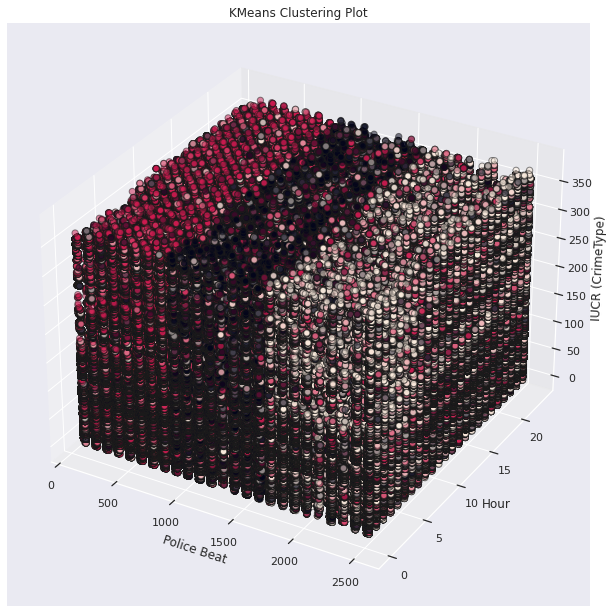

In [30]:
#3d clustering plot bw Police Beat/Hour/IUCR(crimeType)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(final['Beat'],final['Date_hour'],final['IUCR'], c=final['cluster'],  edgecolor = 'k', s=40, alpha =0.5)


ax.set_title("KMeans Clustering Plot")
ax.set_xlabel("Police Beat")
ax.set_ylabel("Hour")
ax.set_zlabel("IUCR (CrimeType)")
ax.dist =10

ax.scatter(clustering_model.cluster_centers_[:,0],clustering_model.cluster_centers_[:,1],clustering_model.cluster_centers_[:,2], s=300, c='r', marker='*', label = 'Centroid')
plt.autoscale(enable=True, axis='x', tight=True)

plt.show()